#Project 3. Lagrange Interpolation
James Della-Giustina


## Overview

In a the *problems with interpolation* assignment you saw that for
\begin{equation*}
  f(x) = \frac{1}{1 + 25 x^2},
\end{equation*}
with uniformly spaced interpolation nodes $\{x_0, x_1, \ldots, x_n\}\subset [-1,1]$, the associated Lagrange interpolating polynomial may not be close to $f$ away from the interpolation nodes. In fact, we saw (at least hueristically) that
\begin{equation*}
  \lim_{n\to \infty}\|f - P_n\|_\infty = \infty,
\end{equation*}
where $P_n\in \mathcal P_n(\mathbb R)$ is the Lagrange interpolant for $f$ associated to uniformly-spaced interpolation nodes $x_0, x_1, \ldots, x_n$. This shows that naively choosing interpolation nodes to be uniformly spaced over the interval of interest is not guaranteed to produce an interpolation polynomial that approximates $f$ well.

In this project we will investigate the role of the choice of interpolation nodes. In particular, the motivation for these investigations is to answer the question of whether there is some other choice of interpolation nodes for which the corresponding Lagrange interpolant is guaranteed to approximate the function of interest well over the interval of interest.

The starting point is the formula discussed in class for the pointwise error between a sufficiently smooth function and its Lagrange interpolant relative to a choice of interpolation nodes $x_0, x_1, \ldots, x_n$. Specifically, we (partially) showed in class that if $f\in C^{n + 1}([a,b])$ and if $P_n\in \mathcal P_n(\mathbb R)$ is the Lagrange interpolant corresponding to the interpolation nodes $\{x_0, x_1, \ldots, x_n\}\subset [a,b]$ then for each $x\in [a,b]$, there is $\xi(x)$ for which both
\begin{equation*}
  \min\{x, x_0, x_1, \ldots, x_n\}< \xi(x) < \max\{x, x_0,x_1, \ldots, x_n\}
\end{equation*}
and
\begin{equation*}
  f(x) - P_n(x)
  =
  \frac{f^{(n + 1)}(\xi(x))}{(n + 1)!}\omega(x; x_0, \ldots, x_n),
\end{equation*}
where, for ease of notation, we set
\begin{equation*}
  \omega(x; x_0, x_1, \ldots, x_n) = \prod_{k = 0}^n (x - x_k).
\end{equation*}
If it is possible to estimate both $\|f^{(n + 1)}\|_\infty$ and $\|\omega(\cdot ; x_0, \ldots, x_n)\|_\infty$, where $\|\cdot \|_\infty$ is the uniform norm over $[a,b]$, then we obtain the following estimate for the error between $f$ and its Lagrange interpolant relative to the nodes $x_0, \ldots, x_n$:
\begin{equation*}
\begin{split}
  |f(x) - P_n(x)|
  & \leq \frac{|f^{(n + 1)}(\xi(x))|}{(n + 1)!}\left|\omega(x; x_0, x_1, \ldots, x_n)\right|\\
  & \leq \frac{\|f^{(n + 1)}\|_\infty}{(n + 1)!}\|\omega(\cdot; x_0, x_1, \ldots, x_n)\|_\infty.  
\end{split}
\end{equation*}
In general, one will need to have some information regarding $f$ to obtain estimates for $\|f^{(n + 1)}\|_\infty$, and some specific examples will be considered below. However, independently of which function $f$ is being considered, we can attempt to choose the nodes $\{x_0, x_1, \ldots, x_n\}\subset [a,b]$ so that $\|\omega(\cdot; x_0, \ldots, x_n)\|_\infty$ is minimized.

For simplicity, let us assume henceforth that $[a,b] = [-1, 1]$. For every choice of nodes $x_0, \ldots, x_n$, by inspection of the formula for $\omega(x; x_0, \ldots, x_n)$ one finds that $\omega(x; x_0, \ldots, x_n)$ is a degree $n + 1$ polynomial with leading coefficient equal to one. In other words, there is some polynomial $Q_n\in \mathcal P_n(\mathbb R)$ for which
\begin{equation*}
  \omega(x; x_0, \ldots, x_n) = x^{n + 1} - Q_n(x; x_0, \ldots, x_n),
\end{equation*}
where the notation $Q_n(x) = Q_n(x; x_0, \ldots, x_n)$ is used to emphasize the dependence on the interpolation nodes $x_0, \ldots, x_n$. Based on this fact, the problem of choosing interpolation nodes $x_0, \ldots, x_n$ for which $\|\omega(\cdot; x_0, \ldots, x_n)\|_\infty$ is minimized can be solved by first finding the polynomial $Q_n\in \mathcal P_n(\mathbb R)$ for which $\|g - Q_n\|_\infty$ is minimal and then choosing the nodes as the zeros of $g - Q_n$, where $g(x) = x^{n + 1}$. Based on Chebychev's Equioscillation Theorem, we showed that the $(n + 1)^{\text{st}}$ degree monic polynomial for which $\|g - Q_n\|_\infty$ is minimal among all such polynomials is given by
\begin{equation*}
  T_{n + 1}(x) = 2^{-n}\cos((n + 1)\cos^{-1}x).
\end{equation*}
In particular, the nodes $x_0, \ldots, x_n$ for which $\|\omega(\cdot; x_0, \ldots, x_n)\|_\infty$ is minimal are exactly the zeros of $T_{n + 1}$ in the interval $[-1,1]$. These nodes are called the *Chebychev nodes* and are given explicitly by
\begin{equation*}
  x_k^c = \cos\left(\frac{\pi(k + 1/2)}{n + 1}\right)
  \qquad
  k = 0, 1, \ldots, n,
\end{equation*}
where the superscript $c$ is placed as a reminder that these are the Chebychev nodes.

## Problem 1
Lets make sure we can successfully generate both uniformly spaced nodes and Chebychev nodes. The code in the following code block generates `num_nodes` uniformly spaced nodes in the interval $[-1,1]$. Modify the code in the third line so that it also creates the same number of Chebychev nodes in $[-1, 1]$. Do not change the name of the `cheb_nodes` variable as it will be used below.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
num_nodes = 12
unif_nodes = np.linspace(-1,1,num_nodes) # this creates uniformly spaced nodes
cheb_nodes=np.empty(num_nodes+1, dtype=float)
for j in range(0, num_nodes+1):
  cheb_nodes[j]=np.cos((np.pi*(j+.5))/(num_nodes+1))

In [ ]:
cheb_nodes

array([ 9.92708874e-01,  9.35016243e-01,  8.22983866e-01,  6.63122658e-01,
        4.64723172e-01,  2.39315664e-01, -1.60812265e-16, -2.39315664e-01,
       -4.64723172e-01, -6.63122658e-01, -8.22983866e-01, -9.35016243e-01,
       -9.92708874e-01])

In [ ]:
cheb_check = np.polynomial.chebyshev.chebpts1(num_nodes+1)
cheb_check

array([-9.92708874e-01, -9.35016243e-01, -8.22983866e-01, -6.63122658e-01,
       -4.64723172e-01, -2.39315664e-01, -1.60812265e-16,  2.39315664e-01,
        4.64723172e-01,  6.63122658e-01,  8.22983866e-01,  9.35016243e-01,
        9.92708874e-01])

To be sure things are working so far, lets create two plots; one for the uniformly-spaced nodes and one for the Chebychev nodes. First, we will need to select some discretization samples, I chose 500 uniformly-spaced samples. This part should not need adjusting.

In [ ]:
# discretization samples
num_samples = 500
samples = np.linspace(-1, 1, num_samples)

Next, lets create the plots. This part should also not need adjusing, but it is a way to be sure that you've correctly defined the `cheb_nodes` variable above. If the plots don't make sense then you'll need to go back and redefine your `cheb_nodes` variable (I will leave it up to you to determine what it means for you plots to "make sense"). I recommend you create a few different plots on your own (I don't need to see all of them) with a few different choices of `num_nodes` to be sure things are working correctly.

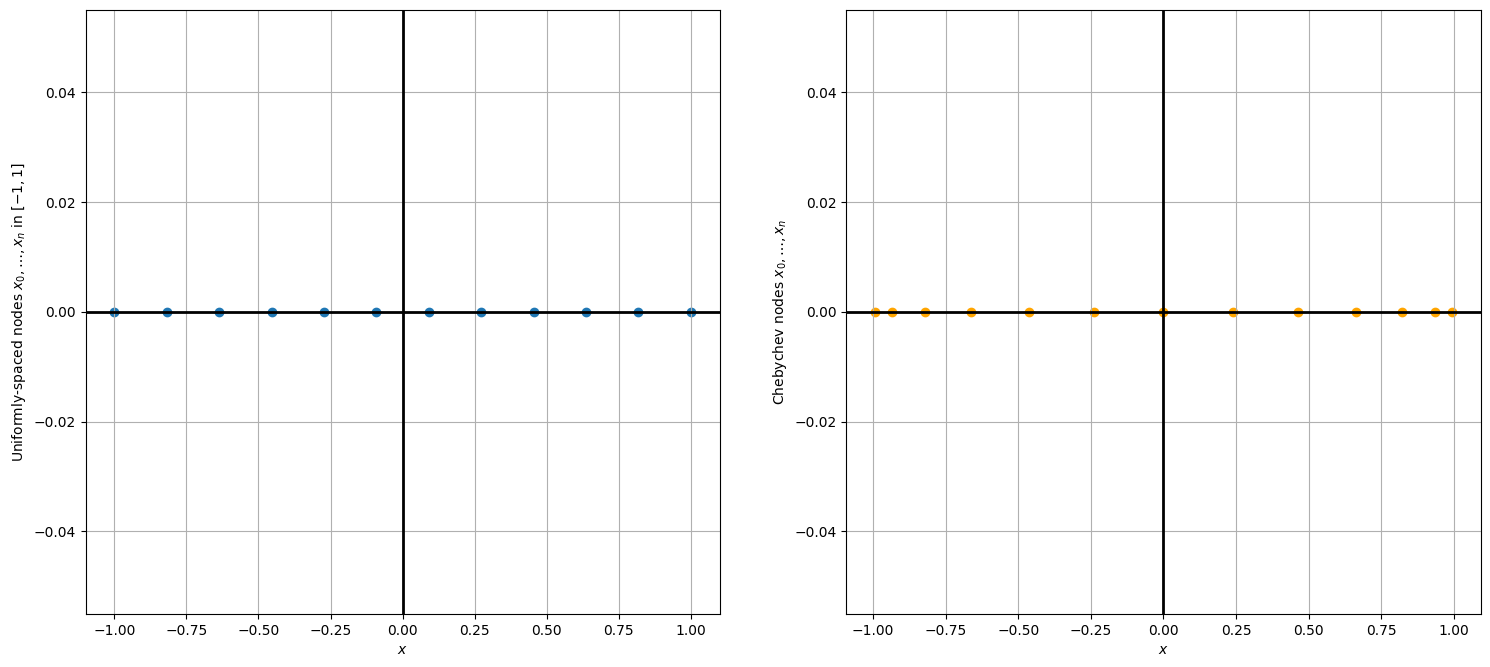

In [ ]:
fig = plt.figure( figsize=(18, 8),dpi=100)

ax = fig.add_subplot(121) # a 1x2 array with an ax object placed in position 1
# add the plots to the first ax object:
ax.axvline(linewidth=2, color = 'black')
ax.axhline(linewidth=2, color='black')
ax.scatter(unif_nodes, np.zeros(num_nodes))
ax.set_xlabel('$x$')
ax.set_ylabel('Uniformly-spaced nodes $x_0, \ldots, x_n$ in $[-1,1]$')
ax.grid(True, which='both')

ax = fig.add_subplot(122) # a 1x2 array with an ax object placed in position 2
# add the plots to the second ax object:
ax.axvline(linewidth=2, color = 'black')
ax.axhline(linewidth=2, color='black')
ax.scatter(cheb_nodes, np.zeros(num_nodes+1), color = 'orange')
ax.set_xlabel('$x$')
ax.set_ylabel('Chebychev nodes $x_0, \ldots, x_n$')
ax.grid(True, which='both')

## Problem 2
Now that we can successfully create both uniformly-spaced nodes and Chebychev nodes, lets create and plot the two corresponding node polynomials so that we can compare their maximum deviations from zero. More specifically, if we denote the uniformly-spaced nodes as $x_0^u, x_1^u, \ldots, x_n^u$ and the Chebychev nodes as $x_0^c, x_1^c, \ldots, x_n^c$ you need to plot both
\begin{equation*}
  \omega(x; x_0^u, \ldots,x_n^u) = \prod_{k = 0}^n (x - x_k^u)
\end{equation*}
and
\begin{equation*}
  \omega(x; x_0^c, \ldots,x_n^c) = \prod_{k = 0}^n (x - x_k^c).
\end{equation*}


The following Python function is called `node_polynomial`. It takes as input an array of nodes $x_0, \ldots, x_n$ and an array of discretization samples and creates a discretized version of the node polynomial
\begin{equation*}
  \omega(x; x_0, \ldots,x_n) = \prod_{k = 0}^n (x - x_k).
\end{equation*}
To create (a discretized version of) $\omega(x; x_0^u, \ldots, x_n^u)$, one can simply call `node_polynomial` with `nodes` specified as uniformly spaced nodes and with `x` specified as any reasonable choice of discretization samples (for example the `samples` variable defined above). Similarly, to create (a discretized version of) $\omega(x;x_0^c, \ldots, x_n^c)$, one can simply call `node_polynomial` with `nodes` specified as Chebychev nodes and with `x` specified as any reasonable choice of discretization samples. Adjusting the code in the `node_polynomial` function is not necessary, but you will need to understand the `node_polynomial` function well enough to use it.  

In [ ]:
def node_polynomial(nodes, x):
  """
  Creates a discretized version of the node polynomial (x- x_0)(x- x_1)...(x - x_n),
  where x_0, x_1, ..., x_n are the (x-coordinates of) interpolation nodes
  Inputs:
  * nodes, a numpy array of (x-coordinates of) interpolation nodes in [-1,1]
  * x, a numpy array of sample points in [-1,1] for discretized representation of function on [-1,1]
  Output:
  * node_poly, a numpy array having the same number of entries as x.
  It is a discretized version of the polynomial (x-x_0)(x - x_1)...(x- x_n), where x_0, x_1, ..., x_n are the
  nodes specified in the nodes input
  """
  node_poly = x - nodes[0]
  for k in range(1, np.shape(nodes)[0]):
    node_poly = np.multiply(node_poly, x - nodes[k])
  return node_poly

Adjust the code in the following code cell so that it plots both $\omega(x; x_0^u, \ldots, x_n^u)$ and $\omega(x; x_0^c, \ldots, x_n^c)$ (the node polynomial corresponding to uniformly spaced nodes and the node polynomial corresponding to Chebychev nodes respectively) on the same axes. The plot of $\omega(x; x_0^u, \ldots, x_n^u)$ is done for you in the first `ax.plot()` command. You will only need to adjust the second `ax.plot()` command so that it plots $\omega(x; x_0^c, \ldots, x_n^c)$ (it is currently set to plot $\omega(x; x_0^u, \ldots, x_n^u)$).

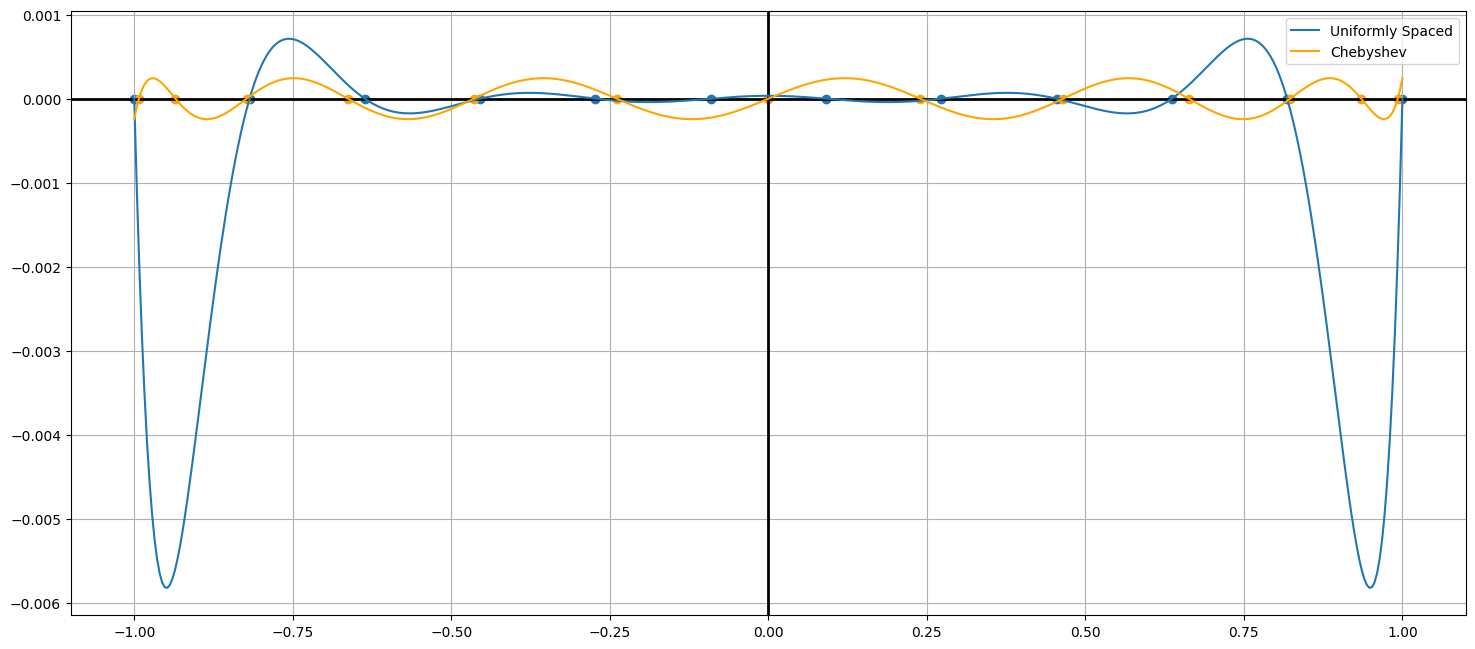

In [ ]:
fig = plt.figure(figsize=(18, 8),dpi=100)
ax = fig.add_subplot(111) # a 1x1 array with an ax object placed in position 1

# add vertical and horizontal axes to the ax object:
ax.axvline(linewidth=2, color='black')
ax.axhline(linewidth=2, color='black')

# plot the uniform nodes and the node polynomial corresponding to uniform nodes
ax.scatter(unif_nodes, np.zeros(num_nodes))
ax.plot(samples, node_polynomial(unif_nodes, samples), label = 'Uniformly Spaced')

# plot the Chebychev nodes and the node polynomial corresponding to Chebychev nodes
ax.scatter(cheb_nodes, np.zeros(num_nodes+1), color = 'orange') # you need to adjust this
ax.plot(samples, node_polynomial(cheb_nodes, samples),
    label = 'Chebyshev', color = 'orange') # you need to adjust this

# put a grid on the plot
ax.grid(True, which='both')

# put a legend
plt.legend();

### Problem 2, Written Response Question 1
Based on your plot, which of $\omega(x; x_0^u, \ldots, x_n^u)$ and $\omega(x; x_0^c, \ldots, x_n^c)$ has smaller maximum deviation from zero? If the plots indicate a similar maximum deviation, increase the number of interpolation nodes, recreate the plot and then come back to this question.  

#### Answer
It is abundantly clear that $\omega(x; x_0^u, \ldots, x_n^u)$ has the larger maximum deviation at the nodes near the end points $[-1,1]$ but smaller deviations as the nodes approach the origin. The Chebyshev nodes $\omega(x; x_0^c, \ldots, x_n^c)$ have a larger deviation near the origin but the deviation is a uniform value between each node and therefore significantly smaller than that of the uniformly spaced nodes near the endpoints $[-1,1]$.

### Problem 2, Written Response Question 2
Use the fact that
\begin{equation*}
  \omega(x; x_0^c, \ldots, x_n^c) = T_{n + 1}(x),
\end{equation*}
where $T_{n + 1}$ is given in the assignment overview, to compute the maximum deviation from zero of $\omega(x; x_0^c, \ldots, x_n^c)$. Explain why your plot of $\omega(x; x_0^c, \ldots, x_n^c)$ supports the outcome of your computation.

#### Answer
The Chebyshev nodes $\omega(x; x_0^c, \ldots, x_n^c)$ give a maximum deviation $\prod_{j=0}^n (y-y_j)$ from zero in $[-1,1]$ of:
$$max_{y\in[-1,1]}\prod_{j=0}^n|y-y_j|=\left|\frac{a-(-b)}{2}\right|^{n+1} \cdot max_{x\in[-1,1]}\prod_{k=0}^n (x-x_k)=\left|\frac{1-(-1)}{2}\right|^{n+1} \cdot max_{x\in[-1,1]}\prod_{k=0}^n (x-x_k)$$
$$=\frac{1}{2^n}\left| \frac{1-(-1)}{2}\right|^{n+1}$$
$$=\frac{1}{2^n}$$
Then $2^{-n}=2^{-12}=\frac{1}{4096}=0.000244$ is the deviation for a total of $n+2=14$ times which is backed visually by the graph and mathematically by Chebyshev's Equi-oscillation Theorem.

### Problem 2, Written Response Question 3
Chebychev's Equioscillation Theorem makes a statement about the values of $x$ where the maxima and minima of $\omega(x; x_0^c, \ldots, x_n^c)$ occur. Briefly explain why your plot of $\omega(x; x_0^c, \ldots, x_n^c)$ is consistent with this statement.

#### Answer
As briefly mentioned above, Chebyshev's Equioscillation Theorem tells us that $P\in \mathcal{P}_n(\mathbb{R})$ is a polynomial of best fit for $f$ iff the difference attains the extreme values
$$\pm ||f-\mathcal{P}||_{\infty}$$
with alternating signs **at least** $n+2$ times. The extreme values are those maximum deviations of $P$ from $f$ which where calculated above which appear once in between every pair of Chebyshev nodes except at the end points $[-1,1]$, where it
achieve the extreme values for $\xi_1 \in [-1,x_0]$ and $\xi_{14} \in [x_{13},1].$

## Problem 3
Here we will investigate the behavior of the maximum deviation from zero of $\omega(x; x_0^u, \ldots, x_n^u)$ and $\omega(x; x_0^c, \ldots, x_n^c)$ as $n$ gets large. The following Python function is called `max_deviations`. It takes as input two positive integers `min_deg` and `max_deg`, where `min_deg` is less than `max_deg`. You should modify the code so that `max_deviations` creates two sequences of maximum deviations from zero corresponding to the degree range specified by the `min_deg` and the `max_deg` inputs. One sequence should correspond to uniformly spaced nodes and the other should correspond to Chebychev nodes. There is no code modifcation necessary for the creation of the maximum deviation sequence corresponding to the uniformly spaced nodes. In orer to create the maximum deviation sequence corresponding to the Chebychev nodes, you will need to modify the `c_nodes` variable in line 18 of the code so that it creates the appropriate number of Chebychev nodes. After you've done so, run the code and verify for yourself that the sequence of maximum deviations "make sense", where I will leave it up to you to determine what it means to "make sense" in this context. I do not need to see any of this verification, but you must do it.

In [ ]:
def max_deviations(min_deg, max_deg):
  """
  Compute the maximum deviations of
  Inputs:
  * min_deg
  * max_deg
  Outputs:
  * max_unif_dev, a numpy array whose nth entry is the maximum deviation
  of the node polynomial of degree n having uniformly spaced interpolation nodes in [-1,1]
  * max_cheb_dev, a numpy array whose nth entry is the maximum deviation
  of the node polynomial of degree n having Chebychev interpolation nodes in [-1,1]
  """
  deg_range = np.arange(min_deg, max_deg)
  max_unif_dev = np.array([])
  max_cheb_dev = np.array([])
  for n in range(min_deg, max_deg):
    u_nodes = np.linspace(-1,1, n+1)
    c_nodes=np.cos([np.pi*(k + .5)/(n+1) for k in range(n+1)])
    unif_poly = node_polynomial(u_nodes, samples)
    cheb_poly = node_polynomial(c_nodes, samples)
    this_u_dev = np.max(np.absolute(unif_poly))
    this_c_dev = np.max(np.absolute(cheb_poly))
    max_unif_dev = np.append(max_unif_dev, this_u_dev)
    max_cheb_dev = np.append(max_cheb_dev, this_c_dev)
  return max_unif_dev, max_cheb_dev

Now lets call `max_deviations` and plot the corresponding sequences of maximum deviations on the same coordinate axes. No modification of the code in either of the following two code blocks is necessary; If you've correctly modified the code in the previous code block, the plots will work and they will "make sense".

In [ ]:
min_deg = 3
max_deg = 20
unif_dev_seq, cheb_dev_seq = max_deviations(min_deg, max_deg)
cheb_dev_seq

array([1.25000000e-01, 6.25000000e-02, 3.12500000e-02, 1.56250000e-02,
       7.81250000e-03, 3.90625000e-03, 1.95312500e-03, 9.76562500e-04,
       4.88281250e-04, 2.44140625e-04, 1.22070312e-04, 6.10351563e-05,
       3.05175781e-05, 1.52587891e-05, 7.62939453e-06, 3.81469727e-06,
       1.90734863e-06])

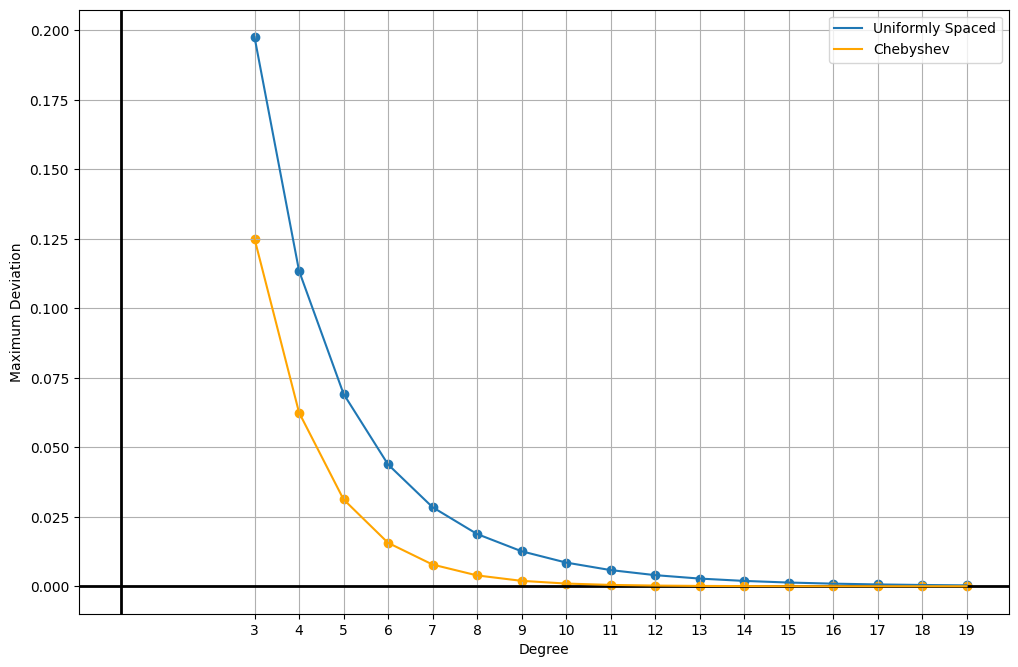

In [ ]:
fig = plt.figure( figsize=(12, 8), dpi=100)
ax = fig.add_subplot(111) # a 1x1 array with an ax object placed in position 1

# add horizontal and vertical lines to the ax object:
ax.axvline(linewidth=2, color = 'black')
ax.axhline(linewidth=2, color = 'black')

# plot the uniform nodes and the node polynomial corresponding to uniform nodes
ax.plot(np.arange(min_deg, max_deg), unif_dev_seq, label = 'Uniformly Spaced')
ax.plot(np.arange(min_deg, max_deg), cheb_dev_seq,
    label = 'Chebyshev', color = 'orange')
ax.scatter(np.arange(min_deg, max_deg), unif_dev_seq)
ax.scatter(np.arange(min_deg, max_deg), cheb_dev_seq, color = 'orange')

# put a grid on the plot
ax.grid(True, which='both')

# label the axes
ax.set_xlabel('Degree')
ax.set_ylabel('Maximum Deviation')
deg_ticks = np.arange(min_deg, max_deg, 1)
ax.set_xticks(deg_ticks)

# include a legend
plt.legend();

### Problem 3, Written Response Question 1
Briefly explain why the plots for the sequences of maximum deviations "make sense" based on the context. Again, I am leaving it up to you to determine what it means to "make sense" in this context.  

#### Answer
The plots for the sequences of maximum deviations "make sense" because we notice that while both the Chebyshev nodes and the uniformly spaced nodes both approach 0 for maximum absolute deviations, the Chebyshev nodes approach 0 faster and intially start with a smaller maximum deviation compared to the uniformly spaced nodes.    

## Problem 4
Let us reconsider the function
\begin{equation*}
  f(x) = \frac{1}{1 + 25 x^2},
\end{equation*}
that was considered in a previous assignment. In the three code blocks that follow, $f$ is defined (as a Python function) and (discretized versions of) the Lagrange basis functions corresponding to user-specified nodes `nodes` are constructed. Finally, `lagrange_f()` constructs (a discretized version of) the Lagrange interpolating polynomial corresponding to the nodes specified by `nodes`. These three code blocks are identical to code blocks that appeared in the *problems with interpolation* assignment.

In [ ]:
def f(x):
  return 1/(1 + 25*x**2)

In [ ]:
def lagrange_basis(nodes, samples):
  """
  Produce the lagrange basis functions corresponding to the given nodes
  Inputs:
  * nodes: an array of x-values, thought of as the x-values at which one
  would want an interpolating polynomial to match a given function f.
  * samples: an array of x-values, these are the discretization points
  for our representation of the Lagrange basis functions. Number of
  samples should far exceed number of nodes.
  Outputs:
  * normalized_basis_funcs: an array of size mxn, where m is the number of samples
  and n is the number of nodes. The jth column is the m-vector discretization of the
  jth Lagrange basis function.
  """
  n = np.shape(nodes)[0]
  m = np.shape(samples)[0]
  shifted_samples = np.zeros((n,m))
  shifted_nodes = np.zeros((n,n))
  basis_funcs = np.zeros((n, m))
  normalizers = np.ones(n)
  for row in range(n):
    shifted_samples[row, :] = samples - nodes[row]
    shifted_nodes[row, :] = nodes - nodes[row]
  for row in range(n):
    normalizers[row] = np.prod(shifted_nodes[np.arange(n)!=row], 0)[row]
    basis_funcs[row,:] = np.prod(shifted_samples[np.arange(n)!=row], 0) # boolean indexing
  normalized_basis_funcs = np.transpose(basis_funcs)/normalizers
  return normalized_basis_funcs

In [ ]:
def lagrange_f(nodes, samples):
  return np.matmul(lagrange_basis(nodes, samples), f(nodes))

The following code block creates two plots. The first plot has the graph of $f$, the $(x,y)$-coordinates of the uniformly-spaced interpolation nodes (as specified by the `unif_nodes` variable in Problem 1) and the Lagrange polynomial corresponding to the uniformly-spaced interpolation nodes (the first plot is similar in spirit to the plots created in the *problems with interpolation* assignment). The second plot will be the same as the first plot with the execption that uniformly-spaced nodes are replaced by Chebychev nodes (as specified by the `cheb_nodes` variable of Problem 1). If your `cheb_nodes` variable above is correct, you should not need to modify the code in the following code block.

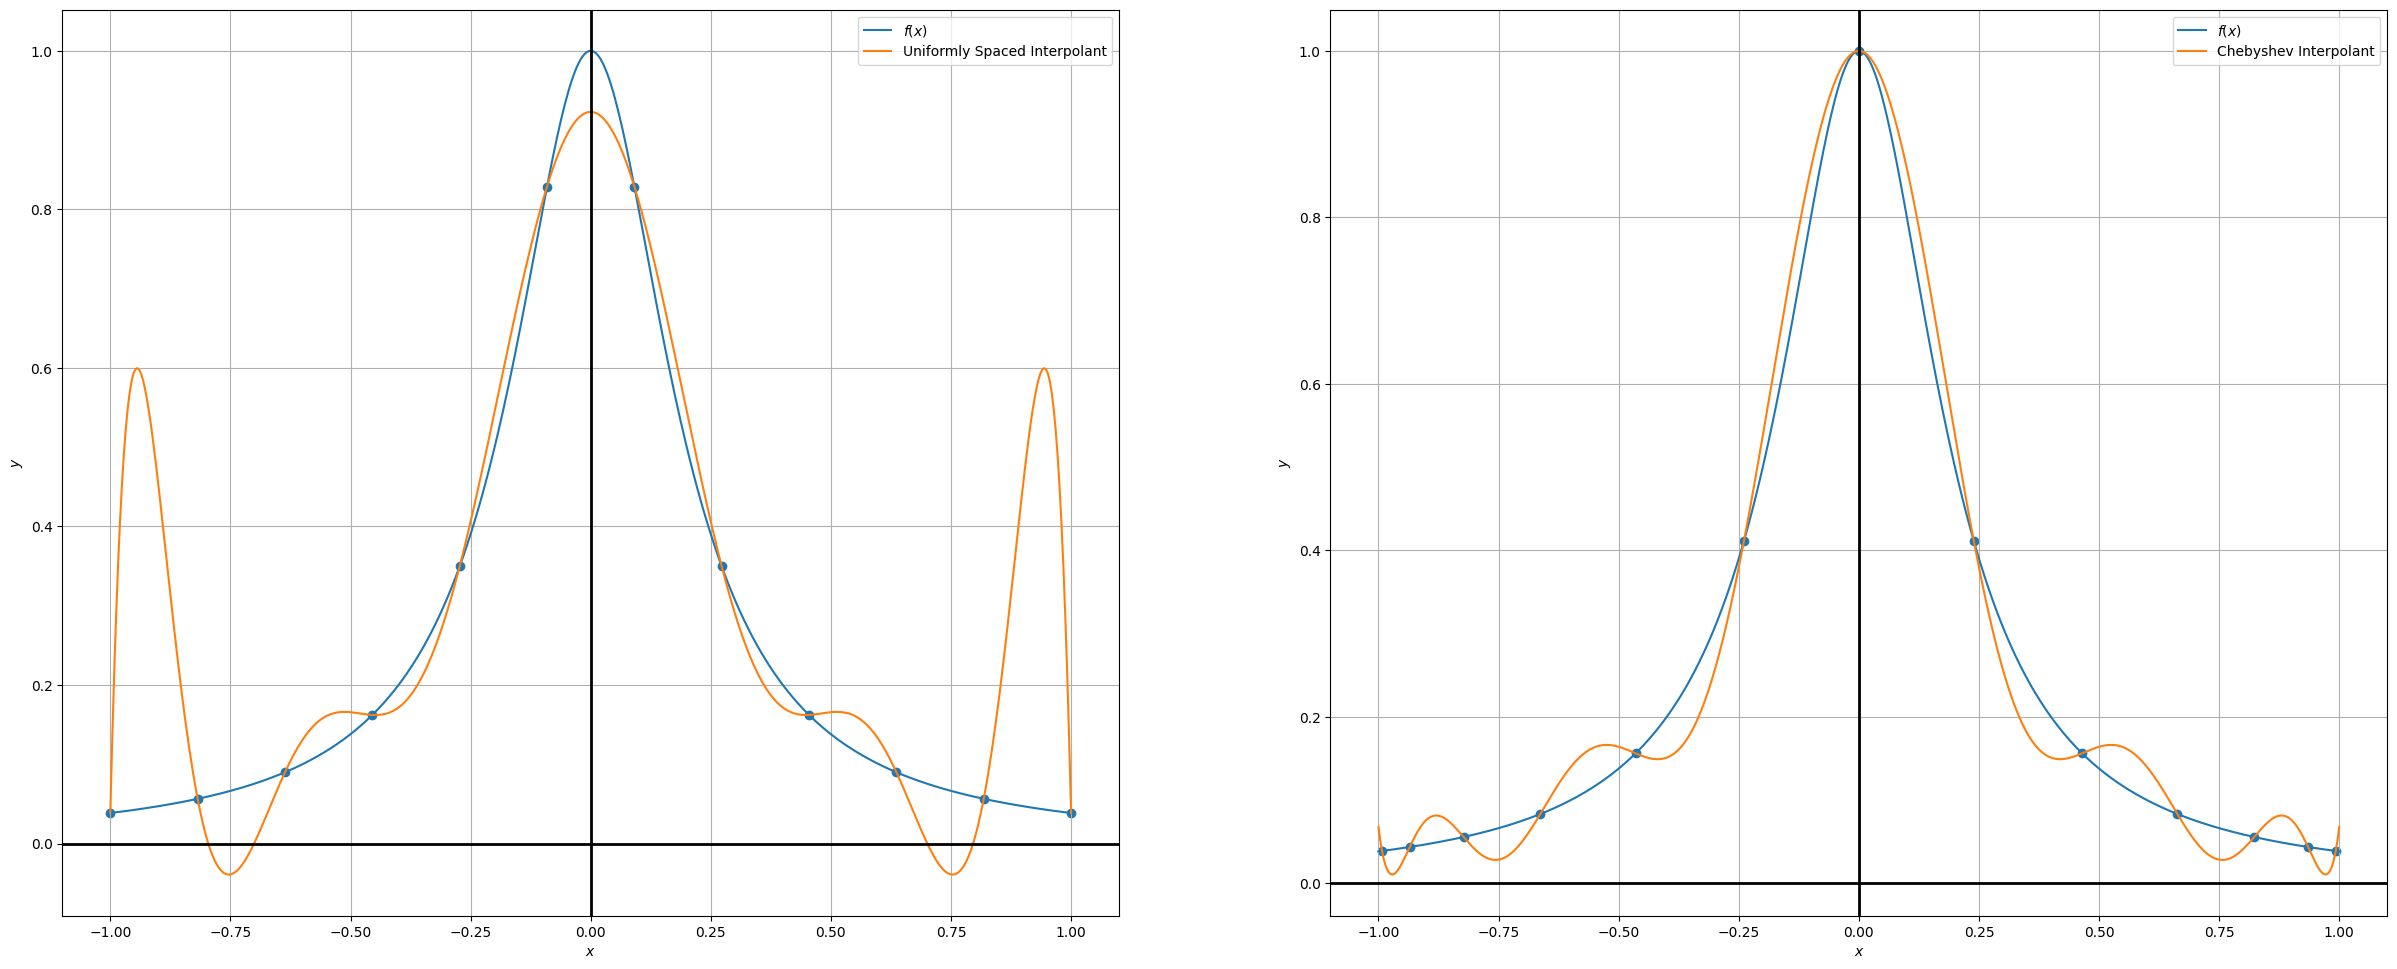

In [ ]:
fig = plt.figure( figsize=(30, 12),dpi=100)

#----------------------------#
#------ the first plot ------#
#----------------------------#
ax = fig.add_subplot(121) # a 1x2 array with an axis object placed in position 1

# add plots to the ax object:
ax.plot(samples, f(samples), label = '$f(x)$')
ax.scatter(unif_nodes, f(unif_nodes))
ax.plot(samples, lagrange_f(unif_nodes, samples),
    label = 'Uniformly Spaced Interpolant'
     )

# labeling and making the plot look pretty:
ax.axvline(linewidth=2, color = 'black')
ax.axhline(linewidth=2, color='black')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.grid(True, which='both')
plt.legend()

#-----------------------------#
#------ the second plot ------#
#-----------------------------#
ax = fig.add_subplot(122) # a 1x2 array with an ax object placed in position 2

# add plots to the ax object:
ax.plot(samples, f(samples), label = '$f(x)$')
ax.scatter(cheb_nodes, f(cheb_nodes))
ax.plot(samples, lagrange_f(cheb_nodes, samples), label = 'Chebyshev Interpolant')

# labeling and making the plot look pretty:
ax.axvline(linewidth=2, color = 'black')
ax.axhline(linewidth=2, color='black')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.grid(True, which='both')
plt.legend();

If you've chosen enough nodes (in the `num_nodes` variable of Problem 1), your plots above should indicate a much better approximation when Chebyshev nodes are used than when uniformly-spaced nodes are used. (There is not much to do for Problem 4, I just wanted you to see the plots side-by-side.)

# Problem 5
This is a written response problem, although you may include code and figures if you feel that doing so improves the presentation of your work.

For $f(x) = \sin(\pi x)$ on $[-1,1]$, we can estimate $\|f^{(n + 1)}\|_\infty$ for all $n$ (in fact we can compute these quantities exactly). For generic $n\in \mathbb N$ and for the Chebyshev nodes $x_0, x_1, \ldots, x_n$ you computed $\|\omega(\cdot; x_0,\ldots x_n)\|_\infty$ in Problem 2, Written Response Question 2. Based on this computation and suitable estimates for $\|f^{(n+ 1)}\|_\infty$, prove that if $P_n$ is the Lagrange interpolant for $f$ of degree $n$ relative to the Chebyshev nodes, then $\|f - P_n\|_\infty\to 0$ as $n\to \infty$. You should find that the formula for the error between a function $f$ and its Lagrange interpolant given in the Overview is useful.

#### Answer
If we assume that $P_n$ is the Lagrange interpolant for $f(x)=\sin(\pi x)$ of degree $n$ relative to the Chebyshev nodes $x_0, x_1, ...,x_n$ then we know from Problem 2, Written Response Question 2 that $\|\omega(\cdot; x_0, \ldots x_n)||_\infty$ equals $\frac{1}{2^n}$. We then estimate $\|sin(\pi x)^{(n+1)}\|_\infty$ to be $\pi^{(n+1)}\|\gamma_{n+1}(\pi x)\|_{\infty}$,
where:  
\begin{equation*}
\gamma_{n+1}(\pi x)=
\begin{cases}
 \pm cos(\pi x)~\text{if $n$ is even}  \\
 \pm sin(\pi x)~\text{if $n$ is odd} \\
\end{cases}
\end{equation*}
Therefore, $\|\gamma_{n+1}(\pi x)\|_{\infty}$ = 1. So we estimate $\|sin(\pi x)^{n+1}\|_{\infty}$ to be $\pi^{n+1}\cdot 1$.
Then using the inequality from the Overview we may write\:
\begin{equation*}
 |sin(\pi x) - P_n| \leq \frac{\|sin(\pi x)^{(n+1)}\|_\infty}{(n+1)!}\cdot \|\omega(\cdot; x_0, x_1, \ldots, x_n)||_\infty = \frac{\pi^{(n+1)}\cdot 1}{(n+1)!}\cdot \frac{1}{2^n}
 \end{equation*}
 We also note that since\:
 \begin{equation*}
 \|sin(\pi x)-P_n\|_\infty = \left\|\omega(\cdot; x_0, x_1, \ldots, x_n)\cdot\frac{sin(\pi x)^{(n+1)}}{(n+1)!}\right\|_\infty \leq \left\|\omega(\cdot; x_0, x_1, \ldots, x_n)\right \|_\infty \cdot \frac{\|\sin(\pi x)^{(n+1)}\|_\infty}{(n+1)!} = \frac{1}{2^n}\cdot \frac{\pi^{(n+1)}\cdot 1}{(n+1)!}
\end{equation*}
which is exactly our estimate from above. Therefore by taking the limit,
\begin{equation*}
\lim_{n\to \infty}\frac{\pi^{(n+1)}}{(n+1)!}\cdot \frac{1}{2^n} = 0
\end{equation*}
We know this quantity to be zero because the factorial $(n+1)!$ in the denominator approaches infinity quicker then the exponential $\pi^{n+1}$ in the numerator, not even considering the additional $2^n$ in the denominator. That is to say:

$$\lim_{n\to \infty}\|sin(\pi x)-P_n\|_\infty \to 0$$

And so the Lagrange interpolant polynomial $P_n$ of best approximation converges to $f(x)=sin(\pi x)$ as $n \to \infty$.

# Submission
This is a group assignment. Please be sure that all participating group members names are on the submitted assignment. Your group should submit exactly one project to Blackboard before Wednesday, December 8 at 11:59pm. Please attempt to submit your work well in advance of the submission deadline so you will have time to resolve unforeseen obstacles to submission (poor internet connection, etc.)